## **Álgebra Linear** | Data Science
> Realização do trabalho para o curso de Álgebra Linar utilizando a análise de componentes principais em um conjunto de dados
##### Este conjunto de dados contém informações sobre o custo de vida em quase 5.000 cidades em todo o mundo
##### Os dados foram coletados raspando o site da Numbeo, https://www.numbeo.com


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')

### Continuação do Notebook Anterior
* Tratamento e Importação de Dados

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Principal-Component-Analysis/main/data/cost-of-living.csv')
dic = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Principal-Component-Analysis/main/data/dictionary.csv')

In [3]:
# Seleção de linhas onde a qualidade dos dados são boas
df = df.loc[df['data_quality'] == 1, :]

# Remover uma coluna a mais contendo o index, e a qualidade dos dados
if len(df.columns) == 59:
    df = df.iloc[:, 1:58].reset_index(drop=True)
    
# Renomeação das colunas
df.columns = ['Nome da cidade', 'Nome do país', 'Refeição, restaurante barato', 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos', 'McMeal no McDonalds (ou Combo Refeição Equivalente)', 'Cerveja Nacional (0,5 litro de chope, em restaurantes)', 'Cerveja Importada (garrafa de 0,33 litro, em restaurantes)', 'Cappuccino (normal, em restaurantes)', 'Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)', 'Água (garrafa de 0,33 litros, em restaurantes)', 'Leite (comum), (1 litro)', 'Pão Branco Fresco (500g)', 'Arroz (branco), (1kg)', 'Ovos (comuns) (12)', 'Queijo Nacional (1kg)', 'Filetes de Frango (1kg)', 'Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira)', 'Maçãs (1kg)', 'Banana (1kg)', 'Laranjas (1kg)', 'Tomate (1kg)', 'Batata (1kg)', 'Cebola (1kg)', 'Alface (1 cabeça)', 'Água (garrafa de 1,5 litro, no mercado)', 'Garrafa de Vinho (Média, no mercado)', 'Cerveja Nacional (garrafa de 0,5 litro, no mercado)', 'Cerveja Importada (garrafa de 0,33 litro, no mercado)', 'Pacote de 20 cigarros (Marlboro)', 'Bilhete de ida (transporte local)', 'Passe mensal (preço normal)', 'Taxi Start (tarifa normal)', 'Táxi 1km (Tarifa Normal)', 'Táxi 1 hora de espera (tarifa normal)', 'Gasolina (1 litro)', 'Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente)', 'Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente)', 'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2', '1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)', 'Fitness Club, mensalidade para 1 adulto', 'Aluguel de quadra de tênis (1 hora no fim de semana)', 'Cinema, Lançamento Internacional, 1 Lugar', 'Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança', 'Escola primária internacional, anual para 1 criança', '1 par de jeans (Levis 501 ou similar)', '1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)', '1 par de tênis de corrida Nike (gama média)', '1 par de sapatos masculinos de negócios em couro', 'Apartamento (1 quarto) no centro da cidade', 'Apartamento (1 quarto) Fora do Centro', 'Apartamento (3 quartos) no centro da cidade', 'Apartamento (3 quartos) Fora do Centro', 'Preço por metro quadrado para comprar apartamento no centro da cidade', 'Preço por metro quadrado para comprar apartamento fora do centro', 'Salário Líquido Médio Mensal (Após Impostos)', 'Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa']

# Organização das colunas
df = df[['Nome da cidade', 'Nome do país', 'Salário Líquido Médio Mensal (Após Impostos)', 'Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa', '1 par de jeans (Levis 501 ou similar)', '1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)', '1 par de tênis de corrida Nike (gama média)', '1 par de sapatos masculinos de negócios em couro', 'Preço por metro quadrado para comprar apartamento no centro da cidade', 'Preço por metro quadrado para comprar apartamento fora do centro', 'Apartamento (1 quarto) no centro da cidade', 'Apartamento (1 quarto) Fora do Centro', 'Apartamento (3 quartos) no centro da cidade', 'Apartamento (3 quartos) Fora do Centro', 'Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente)', 'Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente)', 'Leite (comum), (1 litro)', 'Água (garrafa de 0,33 litros, em restaurantes)', 'Água (garrafa de 1,5 litro, no mercado)', 'Arroz (branco), (1kg)', 'Queijo Nacional (1kg)', 'Filetes de Frango (1kg)', 'Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira)', 'Maçãs (1kg)', 'Banana (1kg)', 'Laranjas (1kg)', 'Tomate (1kg)', 'Batata (1kg)', 'Cebola (1kg)', 'Pão Branco Fresco (500g)', 'Alface (1 cabeça)', 'Ovos (comuns) (12)', 'Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança', 'Escola primária internacional, anual para 1 criança', 'Gasolina (1 litro)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)', 'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2', '1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos)', 'Bilhete de ida (transporte local)', 'Passe mensal (preço normal)', 'Taxi Start (tarifa normal)', 'Táxi 1km (Tarifa Normal)', 'Táxi 1 hora de espera (tarifa normal)', 'Fitness Club, mensalidade para 1 adulto', 'Cinema, Lançamento Internacional, 1 Lugar', 'Refeição, restaurante barato', 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos', 'Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)', 'Cappuccino (normal, em restaurantes)', 'McMeal no McDonalds (ou Combo Refeição Equivalente)', 'Aluguel de quadra de tênis (1 hora no fim de semana)', 'Garrafa de Vinho (Média, no mercado)', 'Cerveja Nacional (0,5 litro de chope, em restaurantes)', 'Cerveja Importada (garrafa de 0,33 litro, em restaurantes)', 'Cerveja Nacional (garrafa de 0,5 litro, no mercado)', 'Cerveja Importada (garrafa de 0,33 litro, no mercado)', 'Pacote de 20 cigarros (Marlboro)']]

# Criação da região com a união das colunas da cidade e país
df['Região'] = df['Nome da cidade'] + ', ' + df['Nome do país']

### Suposição para a Análise
![](https://fatecspgov-my.sharepoint.com/personal/gabriel_silva637_fatec_sp_gov_br/Documents/Image/Web/photo-1581763638046-a3568aca35af.jpg)


> Suponha que eu queira procurar um bom lugar para passar as féfias, porém, não quero ter um custo muito alto com a gasolina, internet, apartamento para a familia no centro, refeições em qualquer restaurante e o básico como aguá e energia, mas quero aproveitar qualquer tipo de entreterimento e lazer e com isso estou disposto a gastar qualquer valor. Qual é o lugar mais adequado para a viagem?

## Pequena análise da Correlação
* Uma visualização das correlações dos alimentos

In [4]:
df.sample(5)

,Nome da cidade,Nome do país,Salário Líquido Médio Mensal (Após Impostos),"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",1 par de jeans (Levis 501 ou similar),"1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)",1 par de tênis de corrida Nike (gama média),1 par de sapatos masculinos de negócios em couro,Preço por metro quadrado para comprar apartamento no centro da cidade,Preço por metro quadrado para comprar apartamento fora do centro,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente),Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente),"Leite (comum), (1 litro)","Água (garrafa de 0,33 litros, em restaurantes)","Água (garrafa de 1,5 litro, no mercado)","Arroz (branco), (1kg)",Queijo Nacional (1kg),Filetes de Frango (1kg),Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira),Maçãs (1kg),Banana (1kg),Laranjas (1kg),Tomate (1kg),Batata (1kg),Cebola (1kg),Pão Branco Fresco (500g),Alface (1 cabeça),Ovos (comuns) (12),"Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança","Escola primária internacional, anual para 1 criança",Gasolina (1 litro),"Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)","Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2",1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos),Bilhete de ida (transporte local),Passe mensal (preço normal),Taxi Start (tarifa normal),Táxi 1km (Tarifa Normal),Táxi 1 hora de espera (tarifa normal),"Fitness Club, mensalidade para 1 adulto","Cinema, Lançamento Internacional, 1 Lugar","Refeição, restaurante barato","Refeição para 2 Pessoas, Restaurante Médio, Três Pratos","Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)","Cappuccino (normal, em restaurantes)",McMeal no McDonalds (ou Combo Refeição Equivalente),Aluguel de quadra de tênis (1 hora no fim de semana),"Garrafa de Vinho (Média, no mercado)","Cerveja Nacional (0,5 litro de chope, em restaurantes)","Cerveja Importada (garrafa de 0,33 litro, em restaurantes)","Cerveja Nacional (garrafa de 0,5 litro, no mercado)","Cerveja Importada (garrafa de 0,33 litro, no mercado)",Pacote de 20 cigarros (Marlboro),Região
444,Leicester,United Kingdom,2577.24,3.08,68.30,42.04,69.07,54.80,3002.94,2282.24,900.88,686.17,1415.39,1081.06,24023.53,29148.55,1.12,1.04,1.09,1.53,7.67,5.90,10.78,1.56,1.22,1.74,2.17,1.08,0.98,1.10,0.77,2.58,1051.03,NaN,1.88,36.64,220.46,0.06,2.76,64.86,3.84,1.31,18.02,32.77,12.01,16.22,60.06,1.79,3.52,7.21,13.21,7.51,5.11,5.41,2.47,1.98,13.21,"Leicester, United Kingdom"
498,Lublin,Poland,851.67,7.67,53.32,28.88,63.31,86.08,2791.77,1987.25,445.64,428.97,589.86,576.70,17461.08,21104.35,0.66,0.89,0.46,1.06,5.55,4.82,7.15,0.89,1.26,1.45,1.88,0.60,0.83,0.69,0.75,2.20,162.91,4331.95,1.42,12.85,162.91,0.07,0.89,26.44,1.56,0.44,7.73,22.22,5.55,6.22,26.66,1.10,1.93,5.55,15.55,4.44,1.78,2.22,0.74,1.07,3.78,"Lublin, Poland"
251,Cartagena,Colombia,326.25,10.16,36.99,23.82,45.14,32.90,2067.66,931.66,476.50,394.52,613.95,544.10,7540.61,14395.10,0.95,0.65,0.71,0.68,3.15,3.00,4.93,1.87,0.55,1.05,0.78,0.56,0.68,0.87,0.64,1.77,104.87,3817.86,0.49,26.07,91.57,0.04,0.55,20.38,1.63,1.49,4.38,20.13,3.06,2.45,20.38,0.62,1.42,4.38,18.00,6.11,1.22,1.89,0.61,1.24,1.83,"Cartagena, Colombia"
70,Fuzhou,China,767.07,5.18,61.46,32.94,92.54,56.92,6285.53,2886.69,363.16,190.89,600.62,401.58,17809.00,19787.78,1.80,0.28,0.65,0.84,10.43,5.10,15.83,2.20,1.40,1.43,1.26,0.63,0.91,1.26,0.42,1.56,279.36,9777.49,1.17,8.63,43.90,0.03,0.14,41.90,1.33,0.31,6.84,27.94,6.63,2.93,17.46,0.44,3.72,4.19,8.38,19.21,0.84,2.10,1.26,1.91,2.79,"Fuzhou, China"
413,Dresden,Germany,2542.74,2.62,89.62,47.43,89.03,115.43,4331.37,3271.89,569.41,458.76,1125.25,857.50,22851.33,25466.76,1.00,2.23,0.88,2.28,10.87,7.15,10.38,2.04,1.74,2.40,1.39,1.40,1.10,1.02,

### Decomposição da matriz
* Matriz de Variância e Covariâncias

In [5]:
# Criação de uma variavel Travel para a análise dos componentes, trv = travel
trv = df[['Região', 'Gasolina (1 litro)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)',
         'Apartamento (3 quartos) no centro da cidade', 'Refeição, restaurante barato',
         'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos',
         'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2']]
trv = trv.set_index('Região')

In [6]:
# Visualizaçãa do DataFrame do Estudo
trv.head(3)

,Gasolina (1 litro),"Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)",Apartamento (3 quartos) no centro da cidade,"Refeição, restaurante barato","Refeição para 2 Pessoas, Restaurante Médio, Três Pratos","Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2"
Região,,,,,,
"Delhi, India",1.25,7.96,596.16,4.90,22.04,57.37
"Shanghai, China",1.17,16.74,2972.57,5.59,40.51,64.76
"Jakarta, Indonesia",0.79,30.45,1117.69,2.54,22.25,80.12


### Matriz de Correlação

['Gasolina (1 litro)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)', 'Apartamento (3 quartos) no centro da cidade', 'Refeição, restaurante barato', 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos', 'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2']


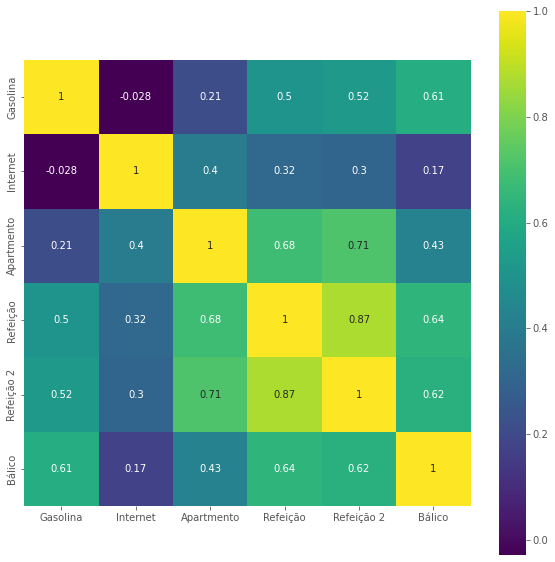

In [7]:
print(list(trv.columns))
plt.figure(figsize=(10,10))
cols = ['Gasolina', 'Internet', 'Apartmento', 'Refeição', 'Refeição 2', 'Bálico']
cor = trv.corr()
sns.heatmap(cor, xticklabels=cols, yticklabels=cols, vmax=1, square=True,annot=True,cmap='viridis');

### Matriz de Covariância e Variância

In [8]:
# Transformação para a Matriz
X = trv.values
S = np.cov(np.transpose(X))

In [9]:
# Visualização da Matriz como DataFrame
pd.DataFrame(X).sample(5)

,0,1,2,3,4,5
419,0.82,8.70,638.66,8.19,36.03,123.70
831,1.86,15.58,350.56,5.19,35.84,194.14
197,1.23,8.57,265.26,3.06,14.84,66.97
697,1.23,11.71,465.36,5.37,31.96,137.08
225,1.20,18.30,563.15,5.59,33.54,67.41


In [10]:
# Matriz de Variância e Covariancia
pd.DataFrame(np.cov(np.transpose(X)))

,0,1,2,3,4,5
0,0.244322,-0.479616,1.089695e+02,1.566211,6.368538,22.811698
1,-0.479616,1165.387728,1.419142e+04,67.737671,254.331950,454.100571
2,108.969531,14191.419123,1.078284e+06,4431.390972,18247.978394,33843.218026
3,1.566211,67.737671,4.431391e+03,39.417378,134.980682,306.737820
4,6.368538,254.331950,1.824798e+04,134.980682,606.808187,1169.195745
5,22.811698,454.100571,3.384322e+04,306.737820,1169.195745,5788.914363


In [11]:
# Variância da Diagonal, ou seja, a variância das variaveis
pd.DataFrame(np.diagonal(S), columns=['Variância'], index=trv.columns)

,Variância
Gasolina (1 litro),2.443221e-01
"Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)",1.165388e+03
Apartamento (3 quartos) no centro da cidade,1.078284e+06
"Refeição, restaurante barato",3.941738e+01
"Refeição para 2 Pessoas, Restaurante Médio, Três Pratos",6.068082e+02
"Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2",5.788914e+03


### Análise de Componentes Principais
* Como um teste, utilizaremos 6 componentes para a análise

In [12]:
# Redução da Dimensionalidade dos Dados, com 6 Dimensões
pca = PCA(n_components=6)
pca.fit(X)

# Temos 6 componentes principais dos nossos dados
print(f'Numero de Componentes: {pca.n_components_}')
display(pd.DataFrame(pca.components_))
print('\nCada linha, são os coeficientes da combinação linear das variáveis que dão origem a primeira componente principal\nA baixo são os componentes principais e sua taxa de explicação deles nos dados')
display(pd.DataFrame( np.round(pca.explained_variance_ratio_, 6), index=pca.singular_values_, columns=['Taxa de Explicação ']))
print('É facil perceber que utilizando uma única componente principal já explica 99% dos dados. Então utilizaremos a 1º')

Numero de Componentes: 6


,0,1,2,3,4,5
0,0.000102,0.013164,0.999265,0.004113,0.016933,0.031511
1,0.004122,0.002262,-0.033621,0.036196,0.130876,0.990156
2,-0.001973,0.999707,-0.013326,0.009891,0.016700,-0.005297
3,0.008931,-0.018881,-0.012713,0.174142,0.975023,-0.135668
4,0.008394,-0.006824,-0.000555,0.983946,-0.177694,-0.012520
5,0.999914,0.002188,0.000129,-0.009945,-0.007725,-0.002779



Cada linha, são os coeficientes da combinação linear das variáveis que dão origem a primeira componente principal
A baixo são os componentes principais e sua taxa de explicação deles nos dados


,Taxa de Explicação
31330.462215,0.994457
2090.273998,0.004426
943.220226,0.000901
452.678672,0.000208
86.247783,0.000008
10.835241,0.000000


É facil perceber que utilizando uma única componente principal já explica 99% dos dados. Então utilizaremos a 1º


### Utilização de uma Única Componente Principal

In [13]:
pca = PCA(n_components=1)
pca.fit(X)

# Criação de uma nova coluna nos dados com os componentes
trv['Comp'] = pca.transform(X)
trv = trv[['Comp', 'Gasolina (1 litro)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)', 'Apartamento (3 quartos) no centro da cidade', 'Refeição, restaurante barato', 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos', 'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2']]

# Temos 6 componentes principais dos nossos dados
print(f'Numero de Componentes: {pca.n_components_}')
display(pd.DataFrame(pca.components_))
print('\nTaxa de explicação do componente nos dados')
display(pd.DataFrame( np.round(pca.explained_variance_ratio_, 6), index=pca.singular_values_, columns=['Taxa de Explicação ']))

Numero de Componentes: 1


,0,1,2,3,4,5
0,0.000102,0.013164,0.999265,0.004113,0.016933,0.031511



Taxa de explicação do componente nos dados


,Taxa de Explicação
31330.462215,0.994457


### Visualização dos Dados com os Componentes
> **Observação:** Esses componentes explicam dentro dessas variáveis, como gasolina e refeição, mas também podeira ser colocadas no conjunto de dados original, onde poderiam ser análisadas mais a fundo, porém dentro do escopo pré definido no inicio

In [14]:
trv.sample(10)

,Comp,Gasolina (1 litro),"Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)",Apartamento (3 quartos) no centro da cidade,"Refeição, restaurante barato","Refeição para 2 Pessoas, Restaurante Médio, Três Pratos","Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2"
Região,,,,,,,
"Eindhoven, Netherlands",324.266383,2.19,40.55,1774.97,17.14,62.32,207.72
"Basingstoke, United Kingdom",169.607726,1.86,30.43,1621.59,18.02,69.07,164.05
"Karlsruhe, Germany",35.636262,2.28,37.97,1485.34,11.17,62.32,234.55
"Indore, India",-1127.692760,1.30,9.43,329.02,3.06,10.41,26.02
"Sliema, Malta",361.415336,1.42,36.35,1814.99,15.58,77.90,111.13
"Valladolid, Spain",-311.162901,1.60,35.32,1142.57,10.39,41.55,111.06
"Szczecin, Poland",-717.520791,1.45,13.01,735.00,7.22,32.21,154.77
"Oviedo, Spain",-570.002353,1.64,39.30,882.89,12.46,38.95,131.14
"Aurangabad, India",-1196.517177,1.33,9.79,260.16,2.02,8.88,26.35


### Ordernação pelo Componente

In [15]:
trv.columns

Index(['Comp', 'Gasolina (1 litro)',
       'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)',
       'Apartamento (3 quartos) no centro da cidade',
       'Refeição, restaurante barato',
       'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos',
       'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2'],
      dtype='object')

In [16]:
print('Conforme abaixo, cada coluna tem seu peso sobre a componente, ou seja, o apartamento tem um peso maior\nLogo, a ordenação pela componente principal será pelos pesos de cada coluna')
display(pd.DataFrame(pca.components_, columns=cols))

print('\nPercebemos que não compensa ir em Nova York, pois não atende os requisitos do objetivo')
display(trv.sort_values('Comp', ascending=0).head(10))

Conforme abaixo, cada coluna tem seu peso sobre a componente, ou seja, o apartamento tem um peso maior
Logo, a ordenação pela componente principal será pelos pesos de cada coluna


,Gasolina,Internet,Apartmento,Refeição,Refeição 2,Bálico
0,0.000102,0.013164,0.999265,0.004113,0.016933,0.031511



Percebemos que não compensa ir em Nova York, pois não atende os requisitos do objetivo


,Comp,Gasolina (1 litro),"Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)",Apartamento (3 quartos) no centro da cidade,"Refeição, restaurante barato","Refeição para 2 Pessoas, Restaurante Médio, Três Pratos","Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2"
Região,,,,,,,
"New York, United States",5692.079474,1.29,69.18,7146.84,25.00,100.00,171.08
"Hamilton, Bermuda",5217.253381,2.25,142.00,6666.67,29.00,150.00,271.65
"Abuja, Nigeria",4473.110095,0.40,55.48,5932.67,3.38,39.43,31.54
"Singapore, Singapore",3862.106148,2.32,34.37,5317.61,10.92,60.06,142.65
"Sarasota, United States",3770.448472,1.18,74.79,5225.00,25.00,70.00,146.65
"Berkeley, United States",3713.430506,1.56,71.25,5166.67,15.50,80.00,184.27
"Boston, United States",3563.969678,1.24,60.18,5017.15,20.00,100.00,175.95
"Asheville, United States",3548.481528,1.18,69.37,5000.00,15.00,65.00,243.91
"Oakland, United States",3417.259751,1.56,56.83,4866.67,17.50,90.00,299.18


In [17]:
# Visualização pela ordenação do componente
trv.sort_values('Comp').head(30)

,Comp,Gasolina (1 litro),"Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)",Apartamento (3 quartos) no centro da cidade,"Refeição, restaurante barato","Refeição para 2 Pessoas, Restaurante Médio, Três Pratos","Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2"
Região,,,,,,,
"Peshawar, Pakistan",-1352.101759,0.65,21.53,103.58,1.34,10.02,48.86
"Trabzon, Turkey",-1320.650264,1.26,7.30,134.12,2.41,13.41,82.48
"Jammu, India",-1309.737074,1.21,7.10,146.91,4.28,14.69,22.37
"Hyderabad City, Pakistan",-1306.810076,0.71,15.59,148.51,1.22,15.59,60.89
"Aydin, Turkey",-1289.453922,1.24,7.98,166.31,2.82,13.41,51.36
"Faisalabad, Pakistan",-1281.946552,0.81,16.71,173.75,1.23,6.68,53.85
"Multan, Pakistan",-1274.373262,0.68,12.81,181.39,1.34,8.46,52.57
"Sylhet, Bangladesh",-1269.380629,0.87,18.73,187.27,1.87,5.62,23.53
"Rawalpindi, Pakistan",-1267.580002,0.70,16.90,188.68,1.23,8.91,35.04


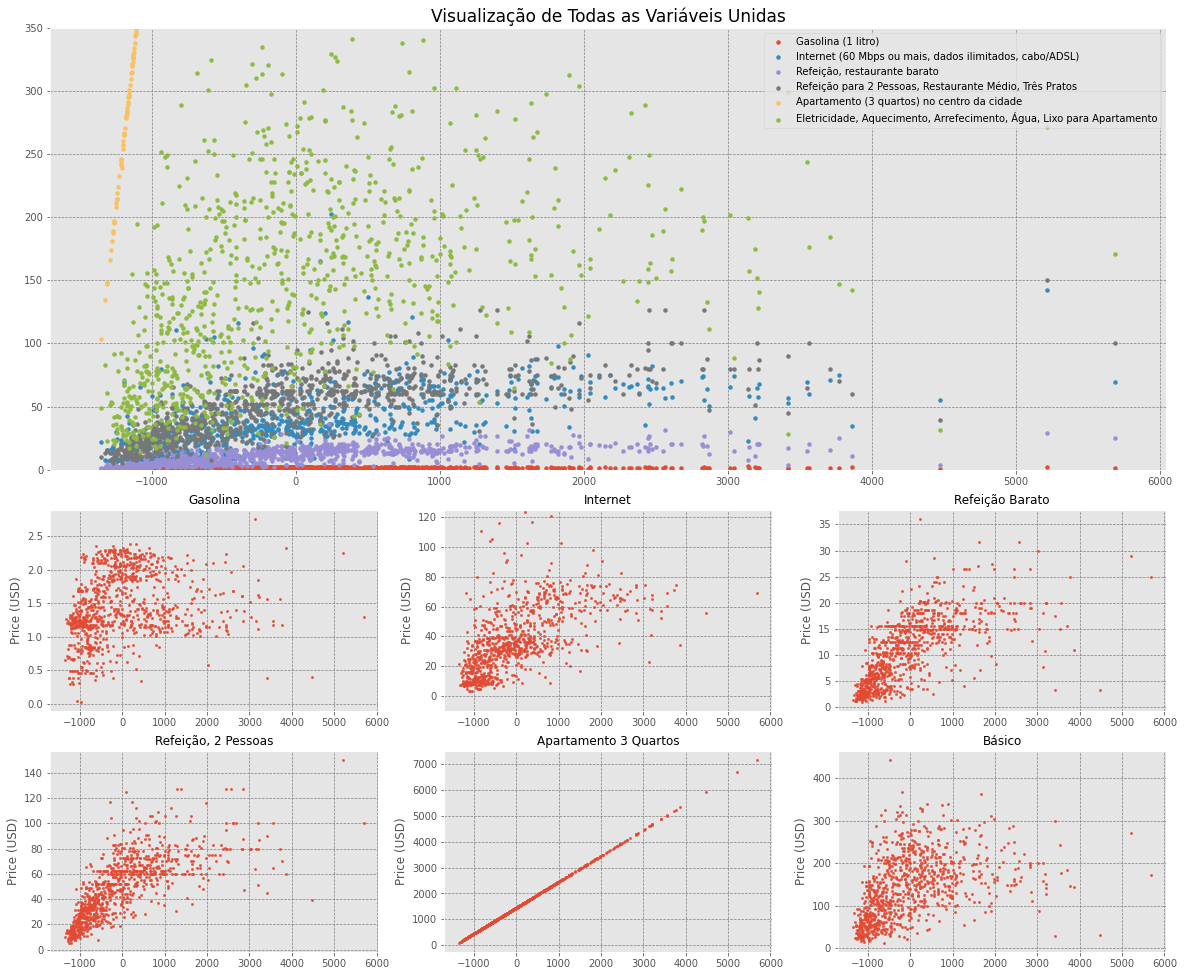

In [18]:
fig = plt.figure(figsize=(20,17))
specs = gridspec.GridSpec( nrows=4, ncols=3, figure=fig)

ax0 = fig.add_subplot( specs[ :2, : ] )
ax1 = fig.add_subplot( specs[ 2 , 0 ] )
ax2 = fig.add_subplot( specs[ 2 , 1 ] )
ax3 = fig.add_subplot( specs[ 2 , 2 ] )
ax4 = fig.add_subplot( specs[ 3 , 0 ] )
ax5 = fig.add_subplot( specs[ 3 , 1 ] )
ax6 = fig.add_subplot( specs[ 3 , 2 ] )

ax0.set_title('Visualização de Todas as Variáveis Unidas', fontdict={'fontsize': 17})
ax0.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax0.scatter(trv['Comp'], trv['Gasolina (1 litro)'], s=15)
ax0.scatter(trv['Comp'], trv['Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)'], s=15)
ax0.scatter(trv['Comp'], trv['Refeição, restaurante barato'], s=15)
ax0.scatter(trv['Comp'], trv['Refeição para 2 Pessoas, Restaurante Médio, Três Pratos'], s=15)
ax0.scatter(trv['Comp'], trv['Apartamento (3 quartos) no centro da cidade'], s=15)
ax0.scatter(trv['Comp'], trv['Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2'], s=15)
ax0.set_ylim([0, 350])
ax0.legend(['Gasolina (1 litro)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)', 'Refeição, restaurante barato', 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos', 'Apartamento (3 quartos) no centro da cidade', 'Eletricidade, Aquecimento, Arrefecimento, Água, Lixo para Apartamento'])

ax1.scatter(trv['Comp'], trv['Gasolina (1 litro)'], s=5)
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax1.set_title('Gasolina', fontdict={'fontsize': 12})
ax1.set_ylabel('Price (USD)')

ax2.scatter(trv['Comp'], trv['Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)'], s=5)
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax2.set_title('Internet', fontdict={'fontsize': 12})
ax2.set_ylabel('Price (USD)')
ax2.set_ylim([-10, 125])

ax3.scatter(trv['Comp'], trv['Refeição, restaurante barato'], s=5)
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax3.set_title('Refeição Barato', fontdict={'fontsize': 12})
ax3.set_ylabel('Price (USD)')

ax4.scatter(trv['Comp'], trv['Refeição para 2 Pessoas, Restaurante Médio, Três Pratos'], s=5)
ax4.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax4.set_title('Refeição, 2 Pessoas', fontdict={'fontsize': 12})
ax4.set_ylabel('Price (USD)')

ax5.scatter(trv['Comp'], trv['Apartamento (3 quartos) no centro da cidade'], s=5)
ax5.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax5.set_title('Apartamento 3 Quartos', fontdict={'fontsize': 12})
ax5.set_ylabel('Price (USD)')

ax6.scatter(trv['Comp'], trv['Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2'], s=5)
ax6.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax6.set_title('Básico', fontdict={'fontsize': 12})
ax6.set_ylabel('Price (USD)');


### Visualização mais Ampla

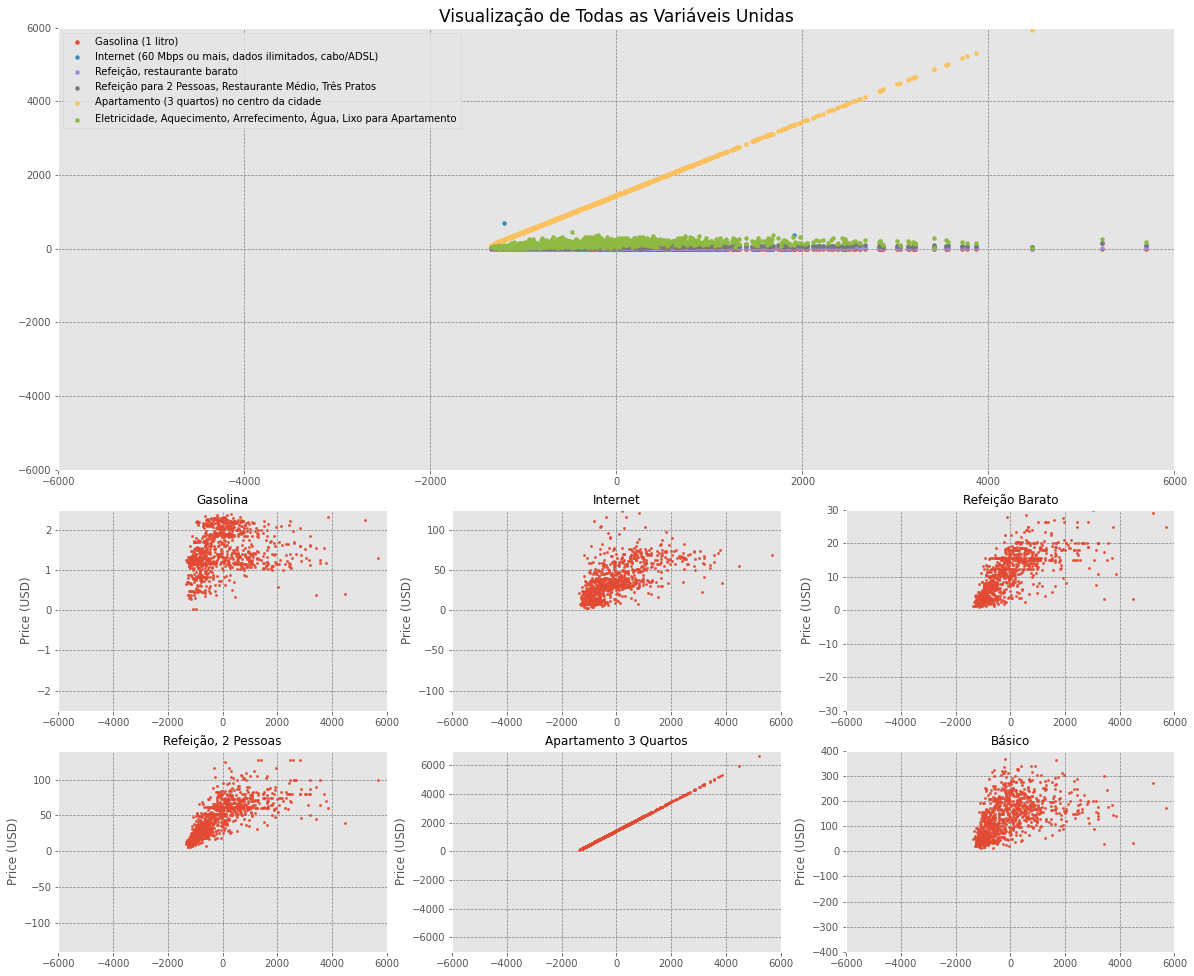

In [19]:
fig = plt.figure(figsize=(20,17))
specs = gridspec.GridSpec( nrows=4, ncols=3, figure=fig)

ax0 = fig.add_subplot( specs[ :2, : ] )
ax1 = fig.add_subplot( specs[ 2 , 0 ] )
ax2 = fig.add_subplot( specs[ 2 , 1 ] )
ax3 = fig.add_subplot( specs[ 2 , 2 ] )
ax4 = fig.add_subplot( specs[ 3 , 0 ] )
ax5 = fig.add_subplot( specs[ 3 , 1 ] )
ax6 = fig.add_subplot( specs[ 3 , 2 ] )

ax0.set_title('Visualização de Todas as Variáveis Unidas', fontdict={'fontsize': 17})
ax0.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax0.scatter(trv['Comp'], trv['Gasolina (1 litro)'], s=15)
ax0.scatter(trv['Comp'], trv['Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)'], s=15)
ax0.scatter(trv['Comp'], trv['Refeição, restaurante barato'], s=15)
ax0.scatter(trv['Comp'], trv['Refeição para 2 Pessoas, Restaurante Médio, Três Pratos'], s=15)
ax0.scatter(trv['Comp'], trv['Apartamento (3 quartos) no centro da cidade'], s=15)
ax0.scatter(trv['Comp'], trv['Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2'], s=15)
ax0.set_xlim([-6000, 6000])
ax0.set_ylim([-6000, 6000])
ax0.legend(['Gasolina (1 litro)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)', 'Refeição, restaurante barato', 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos', 'Apartamento (3 quartos) no centro da cidade', 'Eletricidade, Aquecimento, Arrefecimento, Água, Lixo para Apartamento'])

ax1.scatter(trv['Comp'], trv['Gasolina (1 litro)'], s=5)
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax1.set_title('Gasolina', fontdict={'fontsize': 12})
ax1.set_ylabel('Price (USD)')
ax1.set_xlim([-6000, 6000])
ax1.set_ylim([-2.5, 2.5])

ax2.scatter(trv['Comp'], trv['Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)'], s=5)
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax2.set_title('Internet', fontdict={'fontsize': 12})
ax2.set_ylabel('Price (USD)')
ax2.set_ylim([-10, 175])
ax2.set_xlim([-6000, 6000])
ax2.set_ylim([-125, 125])

ax3.scatter(trv['Comp'], trv['Refeição, restaurante barato'], s=5)
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax3.set_title('Refeição Barato', fontdict={'fontsize': 12})
ax3.set_ylabel('Price (USD)')
ax3.set_xlim([-6000, 6000])
ax3.set_ylim([-30, 30])

ax4.scatter(trv['Comp'], trv['Refeição para 2 Pessoas, Restaurante Médio, Três Pratos'], s=5)
ax4.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax4.set_title('Refeição, 2 Pessoas', fontdict={'fontsize': 12})
ax4.set_ylabel('Price (USD)')
ax4.set_xlim([-6000, 6000])
ax4.set_ylim([-140, 140])

ax5.scatter(trv['Comp'], trv['Apartamento (3 quartos) no centro da cidade'], s=5)
ax5.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax5.set_title('Apartamento 3 Quartos', fontdict={'fontsize': 12})
ax5.set_ylabel('Price (USD)')
ax5.set_xlim([-6000, 6000])
ax5.set_ylim([-7000, 7000])

ax6.scatter(trv['Comp'], trv['Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2'], s=5)
ax6.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
ax6.set_title('Básico', fontdict={'fontsize': 12})
ax6.set_ylabel('Price (USD)')
ax6.set_xlim([-6000, 6000])
ax6.set_ylim([-400, 400]);


### Análise dos Componentes no DataSet
* Suponha que o individuo não queira ir para os países como turkia, india e o paquistão, e sim de países principais como a américa do norte e a europa

In [20]:
df['PCA'] = pca.transform(X)
df.sort_values('PCA').head(3)

,Nome da cidade,Nome do país,Salário Líquido Médio Mensal (Após Impostos),"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",1 par de jeans (Levis 501 ou similar),"1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)",1 par de tênis de corrida Nike (gama média),1 par de sapatos masculinos de negócios em couro,Preço por metro quadrado para comprar apartamento no centro da cidade,Preço por metro quadrado para comprar apartamento fora do centro,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente),Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente),"Leite (comum), (1 litro)","Água (garrafa de 0,33 litros, em restaurantes)","Água (garrafa de 1,5 litro, no mercado)","Arroz (branco), (1kg)",Queijo Nacional (1kg),Filetes de Frango (1kg),Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira),Maçãs (1kg),Banana (1kg),Laranjas (1kg),Tomate (1kg),Batata (1kg),Cebola (1kg),Pão Branco Fresco (500g),Alface (1 cabeça),Ovos (comuns) (12),"Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança","Escola primária internacional, anual para 1 criança",Gasolina (1 litro),"Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)","Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2",1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos),Bilhete de ida (transporte local),Passe mensal (preço normal),Taxi Start (tarifa normal),Táxi 1km (Tarifa Normal),Táxi 1 hora de espera (tarifa normal),"Fitness Club, mensalidade para 1 adulto","Cinema, Lançamento Internacional, 1 Lugar","Refeição, restaurante barato","Refeição para 2 Pessoas, Restaurante Médio, Três Pratos","Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)","Cappuccino (normal, em restaurantes)",McMeal no McDonalds (ou Combo Refeição Equivalente),Aluguel de quadra de tênis (1 hora no fim de semana),"Garrafa de Vinho (Média, no mercado)","Cerveja Nacional (0,5 litro de chope, em restaurantes)","Cerveja Importada (garrafa de 0,33 litro, em restaurantes)","Cerveja Nacional (garrafa de 0,5 litro, no mercado)","Cerveja Importada (garrafa de 0,33 litro, no mercado)",Pacote de 20 cigarros (Marlboro),Região,PCA
149,Peshawar,Pakistan,143.20,13.94,8.91,7.72,57.92,35.64,1913.72,555.89,51.98,53.46,103.58,72.4,10246.91,12118.09,0.57,0.13,0.28,0.74,3.63,1.73,2.78,0.71,0.45,0.86,0.32,0.29,0.26,0.45,0.13,0.91,15.04,712.83,0.65,21.53,48.86,0.01,0.22,7.80,0.67,0.22,0.89,14.11,2.23,1.34,10.02,0.20,0.91,3.56,3.27,1.34,1.56,2.23,1.09,2.29,0.89,"Peshawar, Pakistan",-1352.101759
835,Trabzon,Turkey,359.58,NaN,13.41,17.88,50.07,25.93,938.83,643.77,77.79,53.65,134.12,107.3,29506.13,32456.75,0.68,0.13,0.38,0.83,3.40,2.13,6.56,0.74,1.60,1.20,1.07,0.45,0.35,0.40,0.48,1.17,132.70,4023.56,1.26,7.30,82.48,0.03,0.27,6.44,0.64,0.38,2.55,14.31,2.15,2.41,13.41,0.51,1.41,2.95,12.52,4.14,1.48,1.48,1.56,1.54,1.53,"Trabzon, Turkey",-1320.650264
429,Jammu,India,326.47,9.00,19.59,35.20,37.03,21.12,757.94,367.28,138.75,91.82,146.91,106.1,21424.61,31422.77,0.60,0.13,0.34,0.82,3.11,2.89,4.74,1.29,0.70,0.87,0.66,0.31,0.37,0.40,0.60,0.88,22.72,323.21,1.21,7.10,22.37,0.02,0.49,6.12,0.61,0.24,2.45,19.28,3.37,4.28,14.69,0.34,1.29,3.06,7.35,8.88,1.53,1.84,2.00,2.96,2.75,"Jammu, India",-1309.737074


**Pelo visto, parece que um lugar adequado para a viagem seria na cidade de Amarila, US, pelo seu custo de vida baixo nessa amostra**

In [21]:
# Pelo visto, selecionando alguns países
amostra = df.loc[ (df['Nome do país'] == 'New Zealand') | (df['Nome do país'] == 'United States') | (df['Nome do país'] == 'Australia') |
       (df['Nome do país'] == 'Sweden') | (df['Nome do país'] == 'Iceland') | (df['Nome do país'] == 'Finland'),
       :].sort_values('PCA')
display(amostra)

,Nome da cidade,Nome do país,Salário Líquido Médio Mensal (Após Impostos),"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",1 par de jeans (Levis 501 ou similar),"1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)",1 par de tênis de corrida Nike (gama média),1 par de sapatos masculinos de negócios em couro,Preço por metro quadrado para comprar apartamento no centro da cidade,Preço por metro quadrado para comprar apartamento fora do centro,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente),Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente),"Leite (comum), (1 litro)","Água (garrafa de 0,33 litros, em restaurantes)","Água (garrafa de 1,5 litro, no mercado)","Arroz (branco), (1kg)",Queijo Nacional (1kg),Filetes de Frango (1kg),Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira),Maçãs (1kg),Banana (1kg),Laranjas (1kg),Tomate (1kg),Batata (1kg),Cebola (1kg),Pão Branco Fresco (500g),Alface (1 cabeça),Ovos (comuns) (12),"Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança","Escola primária internacional, anual para 1 criança",Gasolina (1 litro),"Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)","Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2",1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos),Bilhete de ida (transporte local),Passe mensal (preço normal),Taxi Start (tarifa normal),Táxi 1km (Tarifa Normal),Táxi 1 hora de espera (tarifa normal),"Fitness Club, mensalidade para 1 adulto","Cinema, Lançamento Internacional, 1 Lugar","Refeição, restaurante barato","Refeição para 2 Pessoas, Restaurante Médio, Três Pratos","Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)","Cappuccino (normal, em restaurantes)",McMeal no McDonalds (ou Combo Refeição Equivalente),Aluguel de quadra de tênis (1 hora no fim de semana),"Garrafa de Vinho (Média, no mercado)","Cerveja Nacional (0,5 litro de chope, em restaurantes)","Cerveja Importada (garrafa de 0,33 litro, em restaurantes)","Cerveja Nacional (garrafa de 0,5 litro, no mercado)","Cerveja Importada (garrafa de 0,33 litro, no mercado)",Pacote de 20 cigarros (Marlboro),Região,PCA
632,Amarillo,United States,3058.00,5.43,34.00,26.25,70.00,63.00,NaN,NaN,799.00,588.25,995.00,1044.12,12000.00,22500.00,1.23,1.50,1.02,2.89,11.02,12.06,12.39,2.83,1.32,3.27,3.56,1.92,1.56,3.08,1.09,2.07,650.00,5863.33,0.97,62.60,101.38,0.03,5.00,30.00,3.00,1.09,13.50,45.00,10.00,10.00,40.00,1.89,3.34,6.95,10.00,8.00,3.00,5.00,3.21,2.20,8.00,"Amarillo, United States",-458.598237
828,Palmerston North,New Zealand,2640.61,3.95,61.10,38.83,101.35,109.77,2899.50,2625.08,497.06,473.76,1056.25,798.40,17707.65,22160.45,1.65,1.45,0.94,2.54,8.28,7.87,13.78,2.23,1.98,2.17,2.57,2.24,1.91,1.85,2.52,4.47,776.65,5526.34,1.75,56.81,111.78,0.28,1.86,21.75,2.49,1.99,18.64,41.63,10.87,11.18,49.71,2.33,3.04,9.32,16.57,10.56,3.73,4.97,2.33,3.96,20.50,"Palmerston North, New Zealand",-396.972418
508,Fort Wayne,United States,2543.00,5.39,33.17,30.40,71.12,75.67,NaN,1184.03,725.00,747.50,1100.00,950.00,21845.00,32921.00,0.72,1.32,1.16,4.48,14.69,14.32,22.02,4.40,1.24,3.48,3.30,2.08,2.19,2.58,1.49,2.70,1250.00,5500.00,1.19,54.00,198.06,0.05,1.50,NaN,2.50,1.55,20.00,31.50,10.00,15.00,50.00,2.88,4.64,8.00,NaN,10.00,4.50,6.38,1.71,2.87,7.37,"Fort Wayne, United States",-350.552230
770,Linkoping,Sweden,2729.23,3.00,94.76,40.72,114.29,142.87,6334.87,3048.36,714.46,611.26,1143.13,904.98,20147.74,18353.66,1.23,1.80,1.38,2.24,8.07,8.40,16.47,2.64,2.20,2.56,3.38,1.22,1.18,2.03,2.70,2.82,137.33,666.83,1.92,32.95,57.28,0.19,2.48,59.54,11.91,1.59,19.05,38.10,14.29,11.43,66.68,2.10,4.44,7.62,48.58,11.43,6.57,6.62,1.67,1.91,6.67,"Linkoping, Sweden",-311.899339
720,Cairns,Australia,3135.91,3.60,62.87,31.30,73.77,62.03,2682.50,1005.94,779

### Visualização do Brasil
* Londrina é a cidade que apresenta um custo de vidabaixo em relação aos critérios definidos no inicio do estudo
* **Concluindo:** é mais util utilizar o PCA pois permite uma análise multivariavel

In [22]:
# Pelo visto, selecionando alguns países
df.loc[ df['Nome do país'] == 'Brazil', :].sort_values('PCA')

,Nome da cidade,Nome do país,Salário Líquido Médio Mensal (Após Impostos),"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",1 par de jeans (Levis 501 ou similar),"1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)",1 par de tênis de corrida Nike (gama média),1 par de sapatos masculinos de negócios em couro,Preço por metro quadrado para comprar apartamento no centro da cidade,Preço por metro quadrado para comprar apartamento fora do centro,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente),Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente),"Leite (comum), (1 litro)","Água (garrafa de 0,33 litros, em restaurantes)","Água (garrafa de 1,5 litro, no mercado)","Arroz (branco), (1kg)",Queijo Nacional (1kg),Filetes de Frango (1kg),Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira),Maçãs (1kg),Banana (1kg),Laranjas (1kg),Tomate (1kg),Batata (1kg),Cebola (1kg),Pão Branco Fresco (500g),Alface (1 cabeça),Ovos (comuns) (12),"Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança","Escola primária internacional, anual para 1 criança",Gasolina (1 litro),"Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)","Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2",1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos),Bilhete de ida (transporte local),Passe mensal (preço normal),Taxi Start (tarifa normal),Táxi 1km (Tarifa Normal),Táxi 1 hora de espera (tarifa normal),"Fitness Club, mensalidade para 1 adulto","Cinema, Lançamento Internacional, 1 Lugar","Refeição, restaurante barato","Refeição para 2 Pessoas, Restaurante Médio, Três Pratos","Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)","Cappuccino (normal, em restaurantes)",McMeal no McDonalds (ou Combo Refeição Equivalente),Aluguel de quadra de tênis (1 hora no fim de semana),"Garrafa de Vinho (Média, no mercado)","Cerveja Nacional (0,5 litro de chope, em restaurantes)","Cerveja Importada (garrafa de 0,33 litro, em restaurantes)","Cerveja Nacional (garrafa de 0,5 litro, no mercado)","Cerveja Importada (garrafa de 0,33 litro, no mercado)",Pacote de 20 cigarros (Marlboro),Região,PCA
416,Londrina,Brazil,378.89,10.38,44.72,54.66,65.22,77.64,838.52,503.11,170.81,105.59,322.99,223.61,18633.77,23043.76,0.70,0.48,0.56,1.21,7.92,3.63,6.30,1.23,0.72,0.63,1.26,0.70,0.74,1.26,0.69,1.87,310.56,3801.29,1.25,16.03,57.76,NaN,0.82,NaN,1.37,0.93,NaN,17.67,4.66,3.73,16.77,0.84,1.08,5.22,10.48,7.45,1.49,2.80,0.84,3.26,2.42,"Londrina, Brazil",-1132.520836
472,Maringa,Brazil,345.28,11.25,35.34,18.01,48.45,29.19,3818.37,2507.80,298.14,160.72,363.36,248.45,18167.93,27329.53,0.94,0.49,0.65,1.05,6.56,3.59,6.89,1.10,0.79,0.69,1.26,0.98,0.97,1.45,0.61,1.33,172.55,3493.83,1.28,18.59,93.17,NaN,0.84,NaN,0.91,0.47,4.19,17.23,3.82,4.66,18.63,0.87,1.69,5.59,16.15,5.17,1.28,2.66,1.07,2.70,1.86,"Maringa, Brazil",-1090.995685
373,Sorocaba,Brazil,354.79,9.50,42.24,40.37,86.96,71.43,1708.10,1085.42,173.85,121.12,403.73,377.33,18167.93,26266.79,0.90,0.58,0.76,0.88,8.57,3.52,6.95,1.58,1.08,0.93,1.15,1.02,0.99,1.05,0.96,1.87,258.54,5813.74,1.15,19.25,66.75,0.33,1.10,NaN,1.03,0.48,4.84,29.19,6.99,5.22,27.95,1.02,1.54,7.08,9.32,8.39,2.24,2.80,1.10,2.36,3.26,"Sorocaba, Brazil",-1051.319094
123,Fortaleza,Brazil,232.92,9.43,40.32,42.86,65.19,52.59,1348.07,641.09,189.44,121.12,415.02,253.68,17702.08,23869.24,1.11,0.50,0.66,0.92,6.29,3.99,7.29,1.96,0.95,1.09,1.24,1.18,0.82,1.32,0.58,1.40,295.03,6428.65,1.24,16.99,78.38,0.19,0.73,17.24,0.91,0.56,4.43,18.52,5.59,4.84,22.36,0.89,1.57,6.15,24.16,6.52,1.54,2.32,1.07,2.13,1.86,"Fortaleza, Brazil",-1039.796881
351,Joao Pessoa,Brazil,442.55,9.62,52.17,32.14,53.57,31.21,1490.70,1024.86,274.85,181.68,416.15,330.75,14534.34,24679.96,1.14,0.41,0.61,1.09,7.43,4.18,7.77,1.91,0.99,0.

## Fim da Análise
**Obrigado**\
![](https://media.tenor.com/BSaMKJn7ZiUAAAAC/doge-meme.gif)
